In this notebook, I'll create a histogram which displays the difference in ranks of the two wrestlers in each match in a year of matches.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#Add the path to the folder that contains the data. Makes it easier for each of us to use the notebook
path = "/Users/Kyla/Desktop/ErdosDataScienceWork/Project/data/"
#path = "/Users/es/Projects/erdo/sumo/Erdos-Institute-Fall-2024-Project-Sumo/data/"

df1983 = pd.read_csv(path+str(1983)+'.csv')
df1984 = pd.read_csv(path+str(1984)+'.csv')

df = df1983
for year in range(1984,2020):
    year = str(year)
    dfyear = pd.read_csv(path+year+'.csv')
    df = pd.concat([df, dfyear], axis=0, ignore_index=True)

In [2]:
from sumo import *

df = add_col_for_penultimate_day_7_wins(df)
df = get_ordinal_rank(df)
df = get_how_long_in_sumo(df)

In [3]:
df = df.sort_index()

In [4]:
df # This is our big data frame.

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi2_wins_in_tournament,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,r1_sort_rank,r1_ord_rank,r2_sort_rank,r2_ord_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,1,None,None,6132,78,7011,81,1983,1,1
1,1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,...,0,None,None,7011,81,6132,78,1983,1,1
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,0,None,None,6122,76,6131,77,1983,1,1
3,3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,...,1,None,None,6131,77,6122,76,1983,1,1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,1,None,None,6121,75,6112,74,1983,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,S1e,Mitakeumi,12-3,1,yorikiri,12055,...,8,None,None,3011,11,4012,16,2019,5,7
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,...,6,None,None,2012,6,2021,7,2019,14,13
214785,4987,2019.09,15,6599,O2e,Tochinoshin,6-9,0,yorikiri,6468,...,10,None,None,2021,7,2012,6,2019,13,14
214786,4988,2019.09,16,12191,S1w,Takakeisho,(12-3),0,yorikiri,12210,...,12,None,None,3012,12,3011,11,2019,4,5


Let's add a column to our df which tells us the difference in rank between the two players in a given match.

In [5]:
df['difference_in_rank'] = df['r1_ord_rank'] - df['r2_ord_rank']
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,r1_sort_rank,r1_ord_rank,r2_sort_rank,r2_ord_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo,difference_in_rank
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,None,None,6132,78,7011,81,1983,1,1,-3
1,1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,...,None,None,7011,81,6132,78,1983,1,1,3
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,None,None,6122,76,6131,77,1983,1,1,-1
3,3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,...,None,None,6131,77,6122,76,1983,1,1,1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,None,None,6121,75,6112,74,1983,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214783,4985,2019.09,15,12210,S1e,Mitakeumi,12-3,1,yorikiri,12055,...,None,None,3011,11,4012,16,2019,5,7,-5
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,...,None,None,2012,6,2021,7,2019,14,13,-1
214785,4987,2019.09,15,6599,O2e,Tochinoshin,6-9,0,yorikiri,6468,...,None,None,2021,7,2012,6,2019,13,14,1
214786,4988,2019.09,16,12191,S1w,Takakeisho,(12-3),0,yorikiri,12210,...,None,None,3012,12,3011,11,2019,4,5,1


The data frame below only includes the even rows so that we don't use each match twice.

In [6]:
df = df.iloc[::2]
df # This data frame only contains the even-indexed rows.

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,r1_sort_rank,r1_ord_rank,r2_sort_rank,r2_ord_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo,difference_in_rank
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,None,None,6132,78,7011,81,1983,1,1,-3
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,None,None,6122,76,6131,77,1983,1,1,-1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,None,None,6121,75,6112,74,1983,1,1,1
6,6,1983.01,1,4109,J10w,Kotogatake,0-1 (7-8),0,tsukidashi,4129,...,None,None,6102,72,6111,73,1983,1,1,-1
8,8,1983.01,1,4111,J10e,Zaonishiki,0-1 (4-11),0,hatakikomi,4130,...,None,None,6101,71,6092,70,1983,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214778,4980,2019.09,15,11784,M6w,Myogiryu,8-5-2,1,yorikiri,12094,...,None,None,5062,30,4011,15,2019,11,5,15
214780,4982,2019.09,15,6463,M8e,Okinoumi,11-4,0,oshidashi,12191,...,None,None,5081,33,3012,12,2019,11,4,21
214782,4984,2019.09,15,12055,K1w,Endo,8-7,0,yorikiri,12210,...,None,None,4012,16,3011,11,2019,7,5,5
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,...,None,None,2012,6,2021,7,2019,14,13,-1


The data frame below only includes one row from each 1983 match.

In [7]:
df_1983 = df[df['year'] == 1983]
df_1983

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,r1_sort_rank,r1_ord_rank,r2_sort_rank,r2_ord_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo,difference_in_rank
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,None,None,6132,78,7011,81,1983,1,1,-3
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,None,None,6122,76,6131,77,1983,1,1,-1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,None,None,6121,75,6112,74,1983,1,1,1
6,6,1983.01,1,4109,J10w,Kotogatake,0-1 (7-8),0,tsukidashi,4129,...,None,None,6102,72,6111,73,1983,1,1,-1
8,8,1983.01,1,4111,J10e,Zaonishiki,0-1 (4-11),0,hatakikomi,4130,...,None,None,6101,71,6092,70,1983,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,5478,1983.11,15,1363,O2eHD,Hokutenyu,11-4,1,yorikiri,4112,...,None,None,2021,7,2012,6,1983,1,1,1
5480,5480,1983.11,15,4080,Y2eHD,Kitanoumi,11-4,0,yorikiri,4127,...,None,None,1021,3,2011,5,1983,1,1,-2
5482,5482,1983.11,15,1354,Y1w,Chiyonofuji,14-1,1,yorikiri,4104,...,None,None,1012,2,1011,1,1983,1,1,1
5484,5484,1983.11,16,1348,J4w,Jingaku,(11-4),0,sotogake,1378,...,None,None,6042,60,6012,54,1983,1,1,6


The mean difference in rannk among all 1983 matches is close to zero. Update: Check a couple of cells lower to see an issue with this.

In [8]:
df_1983['difference_in_rank'].mean()

np.float64(0.32908163265306123)

In [9]:
for i in range(1983,2020):
    df_year = df[df['year'] == i]
    print(df_year['difference_in_rank'].mean())

0.32908163265306123
0.757768361581921
-0.630943931866572
0.10376687988628287
-0.1281779661016949
0.07454739084132056
0.9908321579689704
0.204369274136716
0.10956036287508723
-0.871875
-1.7818745692625775
-2.8961878829135466
-3.231532147742818
-2.922210849539406
-3.3901662539794835
-5.70614796804446
-4.281665500349895
-2.522095509622238
-1.8497635503819572
-2.0583456425406204
-1.0261343012704174
-1.6100032690421706
-0.9728566699768288
-0.7235067437379576
-1.1762028608582575
-0.9392857142857143
-0.5748884639898024
-0.39142001995344194
-1.4501845018450183
-1.008749189889825
-1.1342894393741851
-1.4370925684485008
-1.5871470301850048
-1.8141969250899574
-1.6307286515001649
-1.4337309476474487
-1.4344689378757516


So one problem with this is that some differences are negative and others are positive. It depends which wrestler comes first. That's not important for what we're doing now, so let's do this again but take the absolute value of the difference before we find the means.

In [10]:
for i in range(1983,2020):
    df_year = df[df['year'] == i]
    print(abs(df_year['difference_in_rank']).mean())

9.149781341107872
9.733050847457626
9.663591199432222
8.785358919687278
9.028601694915254
8.982605608803691
9.17700987306065
9.575757575757576
9.460572226099092
9.041319444444444
9.38697450034459
8.505445881552076
8.468194254445965
7.977140907540089
7.941987973116378
8.402222994095172
7.914975507347796
8.115823235923022
8.269552564568935
8.123338257016249
8.2
7.8767571101667215
7.614366103939093
7.55844572896596
7.520156046814044
7.55487012987013
7.2906309751434035
7.663784502826737
7.6674866748667485
7.6296176279974075
7.88135593220339
7.986636245110821
7.612463485881207
7.822047759241086
7.440817672271678
7.17660702451955
7.329458917835671


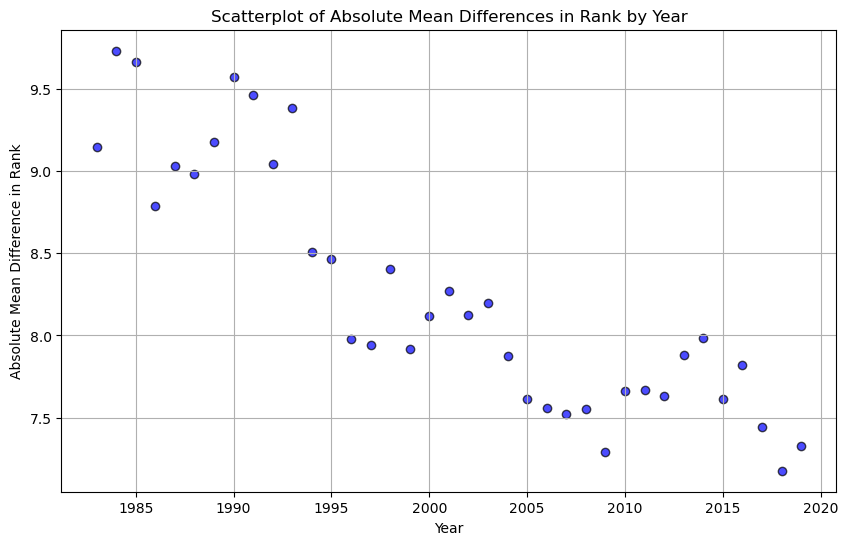

In [11]:
# Initialize lists to store data
years = []
abs_means = []

# Loop through the years and calculate the absolute mean difference in rank
for i in range(1983, 2020):
    df_year = df[df['year'] == i]
    abs_mean = abs(df_year['difference_in_rank']).mean()
    years.append(i)
    abs_means.append(abs_mean)

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(years, abs_means, color='blue', alpha=0.7, edgecolor='k')
plt.title('Scatterplot of Absolute Mean Differences in Rank by Year')
plt.xlabel('Year')
plt.ylabel('Absolute Mean Difference in Rank')
plt.grid(True)
#plt.ylim(0, 20)
plt.show()


Ok, this is cool! It looks like as time has gone on, the average rank difference between the two players in a match has gone down. Let's do a linear regression to verify this. We can also do an inference test to find out if the slope of our regression line is statistically significant. In other words, is this apparent decrease in average rank difference due to chance?

For let's do regression on our scatterplot.

Mean Squared Error: 0.11789278515844888
R^2 Score: 0.7858127777113173
Linear Regression Line Equation: y = -0.0616x + 131.5115


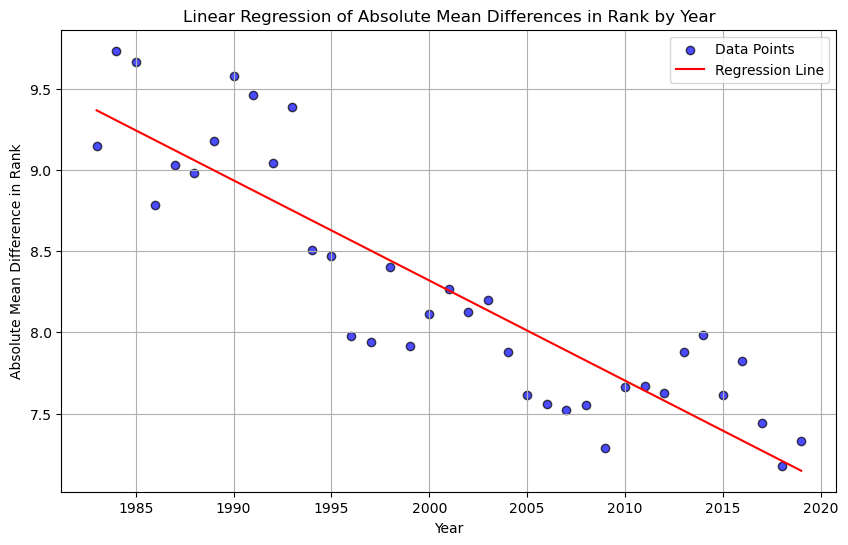

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert lists to numpy arrays
X = np.array(years).reshape(-1, 1)  # Reshape years to be a 2D array
y = np.array(abs_means)

# Create the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Extract the slope (m) and intercept (b)
slope = model.coef_[0]
intercept = model.intercept_

# Display the equation
print(f"Linear Regression Line Equation: y = {slope:.4f}x + {intercept:.4f}")


# Visualize the scatterplot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(years, abs_means, color='blue', alpha=0.7, edgecolor='k', label='Data Points')
plt.plot(years, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression of Absolute Mean Differences in Rank by Year')
plt.xlabel('Year')
plt.ylabel('Absolute Mean Difference in Rank')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from scipy.stats import t

# Number of data points
n = len(years)

# Calculate the Mean Squared Error (MSE)
#residuals = y - y_pred
#mse = np.sum(residuals**2) / (n - 2)

# Calculate the Standard Error of the slope (SE)
x_mean = np.mean(years)
se_slope = np.sqrt(mse / np.sum((years - x_mean)**2))

# Calculate the t-statistic for the slope
t_stat = slope / se_slope

# Degrees of freedom
degfree = n - 2

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - t.cdf(np.abs(t_stat), degfree))

# Display results
print(f"Slope: {slope:.4f}")
print(f"Standard Error of Slope: {se_slope:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The slope is significantly different from zero (p < 0.05).")
else:
    print("The slope is not significantly different from zero (p >= 0.05).")


Slope: -0.0616
Standard Error of Slope: 0.0053
t-statistic: -11.6510
p-value: 0.0000
The slope is significantly different from zero (p < 0.05).


This says that our slope *is* statistically significantly different than 0. In other words, the downward trend we noticed in the scatterplot suggests that average difference in ranks in sumo matches is going down as time passes.

I'd also like to look at whether the winner of each match had the higher rank more often or not.
We set out to make a histogram and went in a difference direction, so I'd like to look at that as well.

Here's our histogram.

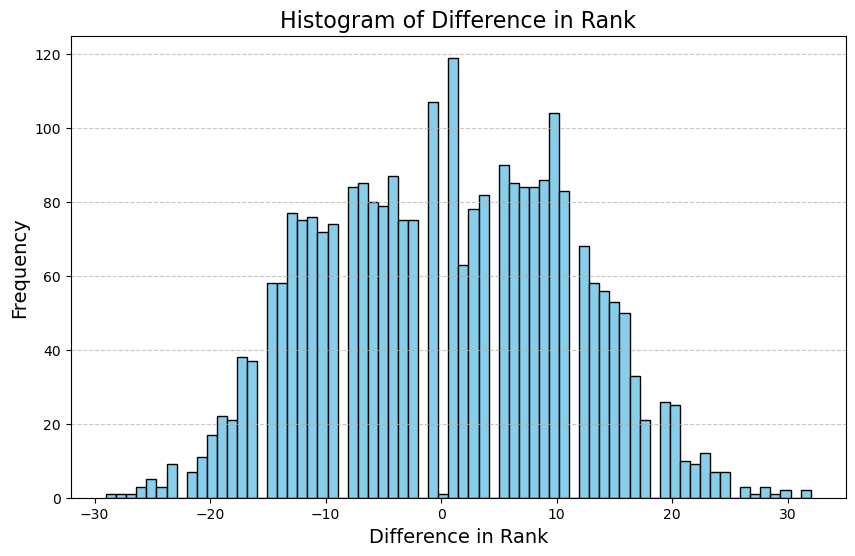

In [14]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.hist(df_1983['difference_in_rank'], bins=70, edgecolor='black', color='skyblue')  # Adjust bins as needed
plt.title('Histogram of Difference in Rank', fontsize=16)
plt.xlabel('Difference in Rank', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid for clarity
plt.show()

Let's make one for each year. I'm going to comment this code out for now because scroling past it is a chore. Feel free to uncomment it whenever though.

In [15]:
# for i in range(1983,2020):
#     df_year = df[df['year'] == i]
#     plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
#     plt.hist(df_year['difference_in_rank'], bins=70, edgecolor='black', color='skyblue')  # Adjust bins as needed
#     plt.title('Histogram of Difference in Rank in'+' '+str(i), fontsize=16)
#     plt.xlabel('Difference in Rank', fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid for clarity
#     plt.show()

There is absolutely some interesting stuff going on here! I'll come back to this later if we have time and decide to do something with it.

In [16]:
df

,index,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,...,rikishi1_penultimate_day_7_wins,rikishi2_penultimate_day_7_wins,r1_sort_rank,r1_ord_rank,r2_sort_rank,r2_ord_rank,year,rikishi1_years_in_sumo,rikishi2_years_in_sumo,difference_in_rank
0,0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,...,None,None,6132,78,7011,81,1983,1,1,-3
2,2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,...,None,None,6122,76,6131,77,1983,1,1,-1
4,4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,...,None,None,6121,75,6112,74,1983,1,1,1
6,6,1983.01,1,4109,J10w,Kotogatake,0-1 (7-8),0,tsukidashi,4129,...,None,None,6102,72,6111,73,1983,1,1,-1
8,8,1983.01,1,4111,J10e,Zaonishiki,0-1 (4-11),0,hatakikomi,4130,...,None,None,6101,71,6092,70,1983,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214778,4980,2019.09,15,11784,M6w,Myogiryu,8-5-2,1,yorikiri,12094,...,None,None,5062,30,4011,15,2019,11,5,15
214780,4982,2019.09,15,6463,M8e,Okinoumi,11-4,0,oshidashi,12191,...,None,None,5081,33,3012,12,2019,11,4,21
214782,4984,2019.09,15,12055,K1w,Endo,8-7,0,yorikiri,12210,...,None,None,4012,16,3011,11,2019,7,5,5
214784,4986,2019.09,15,6468,O1w,Goeido,10-5,1,yorikiri,6599,...,None,None,2012,6,2021,7,2019,14,13,-1


Next, we should figure out how often the higher ranked player won their match. If difference_in_rank is positive, that means that rikishi1 is higher rank.

In [ ]:
count_win = len(df[(df['difference_in_rank'] > 0) & (df['rikishi1_win'] == 1)])
count_win # The number of times that rikishi1 was higher ranked and won.

22292

In [ ]:
count_lose = len(df[(df['difference_in_rank'] < 0) & (df['rikishi1_win'] == 0)])
count_lose # The number of times that rikishi1 was lower ranked and lost.

26332

In [24]:
(count_win + count_lose) / df.shape[0] # This is the proportion of matches that the higher ranked player won.

0.4527627241745349